In [ ]:
from LHEImport.LHEImport import LHEImport as LHEI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# t t~

In [ ]:
numcollisions = 10
particles = []

# index = 0
for i in range(0,numcollisions):
    event, final_particles, init = LHEI('event_files/ttZ_run01.lhe',i).parse()
    for j in range(0, len(final_particles)):
        final_particles[j].__dict__['collision'] = i
  #      np[j].__dict__['index'] = index
        particles.append(final_particles[j].__dict__)
  #      index += 1

df = pd.DataFrame(particles)
df.keys()
tbars =df[df['pdgid'] == -6]
tbars[['px', 'py', 'pz', 'energy']]

In [ ]:
plt.hist(tbars['energy'])
plt.xlabel('Energy GeV')
plt.show()

# ttZ

In [ ]:
numcollisions = 100
ttz_particles = []


# index = 0
for i in range(0,numcollisions):
    event, final_particles = LHEI('event_files/ttZ_events.lhe',i).parse()
    for j in range(0, len(final_particles)):
        final_particles[j].__dict__['collision'] = i
  #      np[j].__dict__['index'] = index
        ttz_particles.append(final_particles[j].__dict__)
  #      index += 1

df = pd.DataFrame(ttz_particles)
tbars =df[df['pdgid'] == -6]
tbars[['px', 'py', 'pz', 'energy']]


In [ ]:
plt.hist(tbars['energy'])
plt.show()

Determining the init block

In [ ]:
from os import listdir
from os.path import isfile, join

onlyfiles = [join('event_files/',f) for f in listdir('event_files/') if isfile(join('event_files/',f))]
print(onlyfiles)



In [ ]:
rows = []
for file in onlyfiles: 
    a,b,init = LHEI(file).parse()
    init['file']=file
    rows.append(init)
    
init_data = pd.DataFrame(rows)
init_data

In [ ]:
data = LHEI('event_files/ttZ_run01.lhe')
Data= data.importevents(limit_events=True)

In [ ]:
rows = []

In [ ]:
for i in range(0, len(Data['eventdata'])):
    particles = Data['eventdata'][i]['final_particles']
    for particle in particles:
        rows.append(particle.__dict__)
df2 = pd.DataFrame(rows)
df2

In [ ]:
# z total momentum
plt.hist(df2[(df2.pdgid==23)].pt)
plt.xlabel('$p_t$')
plt.ylabel('Ocurrences')
plt.show()

In [ ]:
 # df1 = pd.DataFrame(Data['stats'], index=[0])
# df2 = pd.DataFrame(Data['eventdata'][1]['final_particles'])
# df2

## Generated new data set with systematics

In [1]:
from LHEImport.LHEImport import LHEImport as LHEI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = LHEI('event_files_lhapdf/ttZ_events_lhapdf_02.lhe')

In [ ]:
# Data= data.importevents(limit_events=True)

In [ ]:
#checking first event

event_1_particles = Data['eventdata'][0]['final_particles']

In [ ]:
#single event table, concat df for each particle
dff = pd.concat([pd.DataFrame([particle.__dict__]) for particle in event_1_particles], ignore_index=True)
dff

In [3]:
Data = data.importevents(limit_events=False)

In [4]:
# generating a big list of all data, can then be imported into a pd.DataFrame
datalist = []
for i in range(0, len(Data['eventdata'])):
    event_particles = Data['eventdata'][i]['final_particles']
    for particle in event_particles:
        datalist.append(particle.__dict__)

In [5]:
df = pd.DataFrame(datalist)
Zs = df[(df.pdgid==23)]

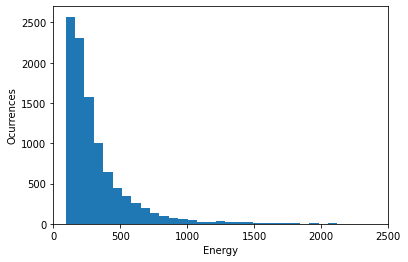

In [6]:
plt.hist(Zs['energy'],bins=50)
plt.xlim(0,2500)
plt.xlabel('Energy')
plt.ylabel('Ocurrences')
plt.show()

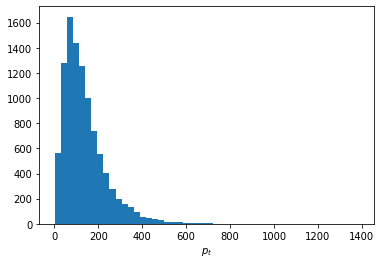

In [7]:
plt.hist(Zs['pt'], bins=50)
plt.xlabel('$p_t$')
plt.show()

## Using scikit-hep/vector testing

In [8]:
import vector

In [9]:
Zs = df.loc[df['pdgid'] ==23]
ts = df.loc[df['pdgid'] ==6]
tbars = df.loc[df['pdgid'] ==-6]

In [10]:
z_vecs=vector.arr({
    'pt':Zs['pt'].values, 
    'phi':Zs['phi'].values, 
    'eta':Zs['pt'].values, 
    'e':Zs['energy'].values
                })
t_vecs=vector.arr({
    'pt':ts['pt'].values, 
    'phi':ts['phi'].values, 
    'eta':ts['pt'].values, 
    'e':ts['energy'].values
                })
tbar_vecs=vector.arr({
    'pt':tbars['pt'].values, 
    'phi':tbars['phi'].values, 
    'eta':tbars['pt'].values, 
    'e':tbars['energy'].values
                })

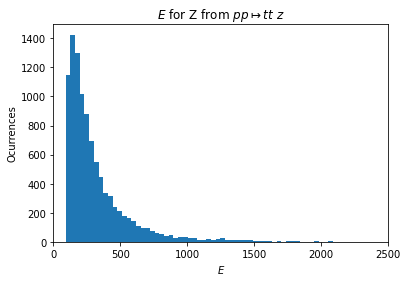

In [11]:
plt.hist(z_vecs.e,bins=100)
plt.title('$E$ for Z from $p p \mapsto t t~ z$')
plt.xlim(0,2500)
plt.xlabel('$E$')
plt.ylabel('Ocurrences')
plt.show()

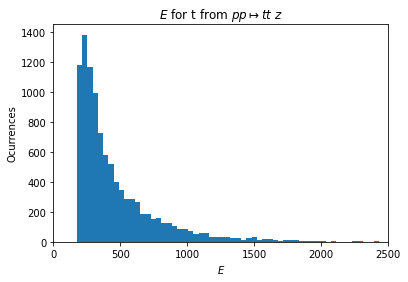

In [12]:
plt.hist(t_vecs.e,bins=100)
plt.title('$E$ for t from $p p \mapsto t t~ z$')
plt.xlim(0,2500)
plt.xlabel('$E$')
plt.ylabel('Ocurrences')
plt.show()

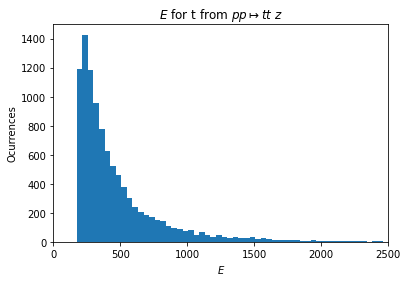

In [13]:
plt.hist(tbar_vecs.e,bins=100)
plt.title('$E$ for t from $p p \mapsto t t~ z$')
plt.xlim(0,2500)
plt.xlabel('$E$')
plt.ylabel('Ocurrences')
plt.show()

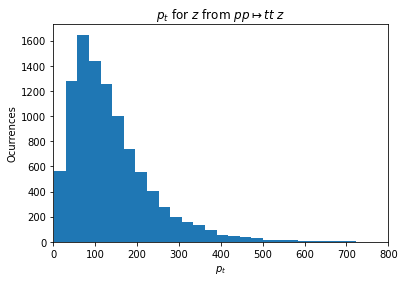

In [14]:
plt.hist(z_vecs.pt, bins=50)
plt.title('$p_t$ for $z$ from $p p \mapsto t t~ z$')
plt.xlim(0,800)
plt.xlabel('$p_t$')
plt.ylabel('Ocurrences')
plt.show()

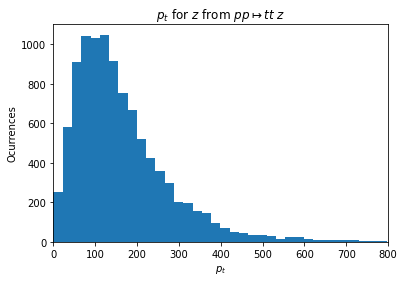

In [15]:
plt.hist(t_vecs.pt, bins=50)
plt.title('$p_t$ for $z$ from $p p \mapsto t t~ z$')
plt.xlim(0,800)
plt.xlabel('$p_t$')
plt.ylabel('Ocurrences')
plt.show()

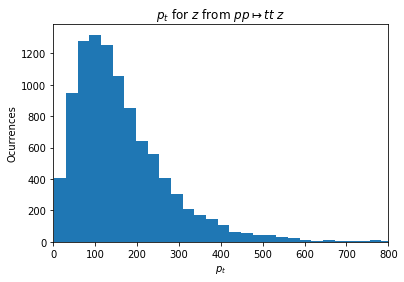

In [16]:
plt.hist(tbar_vecs.pt, bins=50)
plt.title('$p_t$ for $t$ from $p p \mapsto t t~ z$')
plt.xlim(0,800)
plt.xlabel('$p_t$')
plt.ylabel('Ocurrences')
plt.show()